# Automatic data collection on the Web

Before we start to tackle some nice web pages (HTML), we will discover the XML language which is a good introduction to scraping data on the web.

## XML

The following lists a few properties of the XML language.

- XML was created to facilitate data exchange between machines and software.

- XML is a language that is written using tags.

- XML is a W3C recommendation, so it is a technology with strict rules to follow.

- XML is intended to be understandable by everyone: people and machines alike.

- XML allows us to create our own vocabulary using a set of customizable rules and tags.

- XML is also compatible with the web so that data exchanges can be easily carried out over the Internet.

- XML is therefore standardized, simple, but above all extensible and configurable so that any type of data can be described.

Here is an example of a XML document, which we have saved as `data.xml` in the `assets/` directory.

Display its content!

In [4]:
filename = "./assets/data.xml"
file = open(filename, "r")
print(file.read())
file.close()

<?xml version="1.0" encoding="UTF-8"?>
<users>
    <user data-id="101">
        <name>Zorro</name>
        <job>Dancer</job>
    </user>
    <user data-id="102">
        <name>Hulk</name>
        <job>Football player</job>
    </user>
    <user data-id="103">
        <name>Zidane</name>
        <job>Star</job>
    </user>
    <user data-id="104">
        <name>Beans</name>
        <job>Grocer</job>
    </user>
    <user data-id="105">
        <name>Batman</name>
        <job>Veterinary</job>
    </user>
    <user data-id="106">
        <name>Spiderman</name>
        <job>Veterinary</job>
    </user>
</users>



The first line indicates the encoding (we always stay in the UTF-8 encoding). Then we notice that the "users" tag has other "user" tags that themselves have their own tags. The data is hierarchized in a tree and each node provides information.

Here is a small script that displays all the usernames.

You will first have to install the `lxml` package. It depends on the `numpy` package, which will be installed alongside `lxml` if you use a standard package manager. However, some version of `numpy` give problems, so changing the version might be the first thing that you can troubleshoot if you fail to import `lxml`.

In [13]:
from lxml import etree

# I define my source document
tree = etree.parse(filename)
# I look at my document and identify the path to the tag to get to the "user" information

# The user name we are looking for is in it's own tag, `name`. Which itself
# is in a tag `user`, and lastly `user` is contained in a `users` tag.
# So tree.xpath("/users/user/name") contains the tags associated with our search
for user in tree.xpath("/users/user/name"):
    # I only want to display the content (.text) of the `/users/user/name` tags
    print(user.text)

Zorro
Hulk
Zidane
Beans
Batman
Spiderman


In [6]:
tree.xpath("/users/user/name")[0].text

'Zorro'

In [15]:
# You can display the attributes of the tags that store this information
tree = etree.parse(filename)
for user in tree.xpath("/users/user"):
    print(user.get("data-id"))

101
102
103
104
105
106


You can refine the display by proposing to display only users whose job is Veterinary 

In [16]:
tree = etree.parse(filename)
# Quel joli petit dictionnaire
for user in tree.xpath("/users/user[job='Veterinary']/name"):
    print(user.text)
    

Batman
<class 'lxml.etree._ElementTree'>
Spiderman
<class 'lxml.etree._ElementTree'>


## Web scraping

Web scraping is a technique for automatically extracting information from websites. It is very useful in a lot of use cases:

- **E-commerce**: create Excel sheet gathering all products from a provider's website
- **Business prospecting**: extract contact information from websites (phone numbers, e-mail addresses...)
- **Media analysis**: collect articles from online newspapers on a daily basis
- ...

Of course this task could be done by a human but this would be very painful and repetitive especially when the number of targeted pages is huge. To save time, we can automate it and, as usual, Python has a solution for that.

The idea is to automate the human task by **fetching** pages and **extracting** data from them.

**Fetching**

Fetching is the downloading of the `html` source code of a page. It's exactly what your browser does when you open a website. To test it, open your browser, right-click anywhere on the page and select `view page source`. This is what Python will automate !

**Extraction**

From the `html` page you can extract, transform and load information in Python exactly like we did before with `xml`.

Let's implement those two steps in few lines of code!

### Fetching: Scraping via HTTP requests

HTTP (HyperText Transfer Protocol) is a protocol that will allow a **client** (you, through your browser or your code for example) to communicate with a **server** connected to the network (hosting a website or an internet document)

Requests always go in pairs: the request (from the client) and the response (from the server).
If this is not the case, it is because a problem has occurred at a point in the network.

In Python we can use the library `requests` with the method `get`. It will emulate what you are doing manually in your browser.

Start by installing the library using `pip install requests` or the `conda` package manager.

Then let's take an URL, download the content and display it to see what happens.

https://www.becode.org/about/ 200
b'<!DOCTYPE html>\n<html lang="en-US">\n<head><style>img.lazy{min-height:1px}</style><link rel="preload" href="https://becode.org/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" as="script">\n\t<meta charset="UTF-8">\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0, viewport-fit=cover" />\t\t<script data-cookieconsent="ignore">\n\twindow.dataLayer = window.dataLayer || [];\n\tfunction gtag() {\n\t\tdataLayer.push(arguments);\n\t}\n\tgtag("consent", "default", {\n\t\tad_user_data: "denied",\n\t\tad_personalization: "denied",\n\t\tad_storage: "denied",\n\t\tanalytics_storage: "denied",\n\t\tfunctionality_storage: "denied",\n\t\tpersonalization_storage: "denied",\n\t\tsecurity_storage: "granted",\n\t\twait_for_update: 500,\n\t});\n\tgtag("set", "ads_data_redaction", true);\n\tgtag("set", "url_passthrough", true);\n</script>\n<script type="text/javascript"\n\t\tid="Cookiebot"\n\t\tsrc="https://consent.cookiebot.com/uc.js"\n
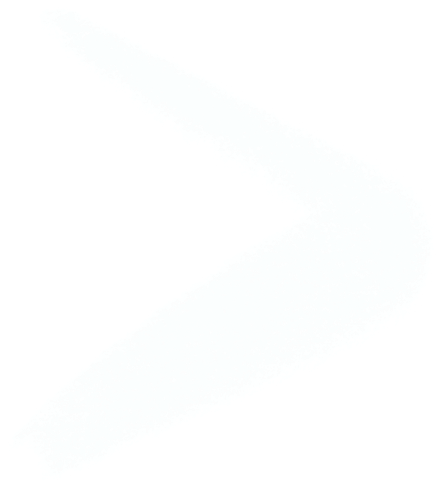
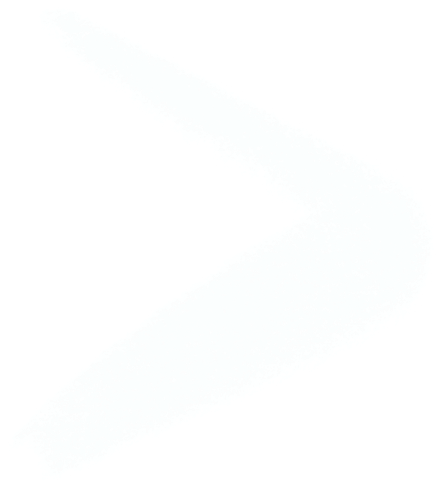
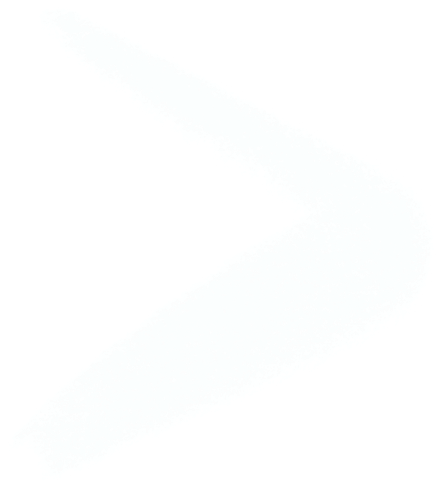
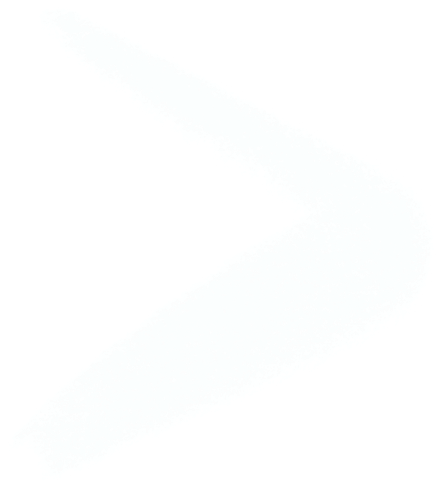
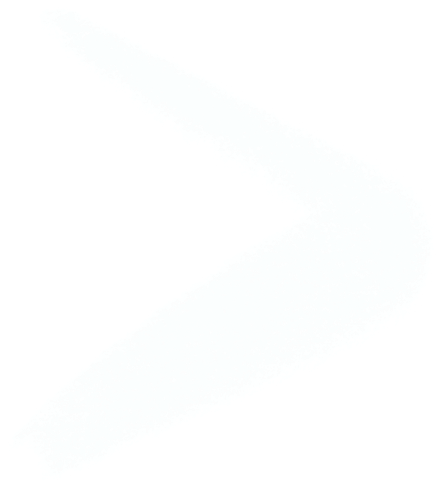
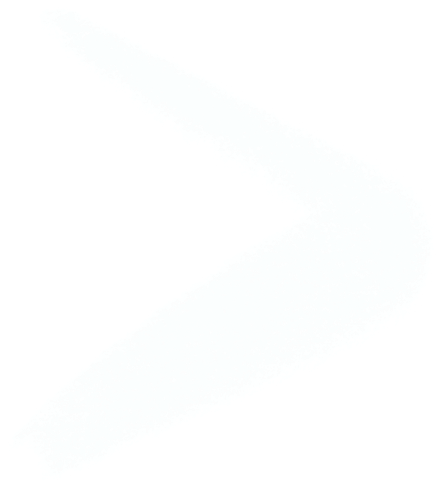

In [17]:
import requests

# Url of website
url = "https://www.becode.org/about/"
# I send my HTTP request with a "GET" to the site server to identify in the url
r = requests.get(url)
# I display the requested url and the return of the server
print(url, r.status_code)
# I will store the content of the website in a variable and print it
content = r.content
print(content)

As you can see the content is not easily readable. But like `xml`, `html` is a structured representation of the content. We then can use Python for reading it.

### Extraction using Beautifulsoup

For parsing `xml`we have used `xpath`. This is also possible for `html` ([see here](https://python-docs.readthedocs.io/en/latest/scenarios/scrape.html)).

However there is a more _user-friendly_ library in Python that does the job quite well: `beautifulsoup`. We will use it in this notebook.

First install it using `pip install beautifulsoup4` or the `conda` package manager.

We can load the website content we just scraped in a Beautifulsoup object


In [10]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(content, "html")

The `html` tree of the page is now loaded and we can access its information. For example we can get the title of the page by recovering the content of the tag `h1`

In [11]:
for tag in soup.find_all("h1"):
    # We only retrieve the content ==> .text
    print(tag.text)

Passion for learning.


Do the same with `h2` tags.

In [19]:
for tag in soup.find_all('h2'):
    print(tag.text)

BeCode’s pedagogical framework
Our goal
We deliver!
Our Team
How it started...
Contact us
Job seekers
Companies
BeCode


And now, do the same with the `p` tags (that stand for _paragraphs_)

In [20]:
for tag in soup.find_all('p'):
    print(tag.text)

At BeCode, we are believers.
We believe we can change the world, make it a better place. A more equal place, where everyone, whatever its level of education, can find its proper place in a real diverse team. Where there is access to proper education, whatever their background. Therefore we provide qualitative, competitive and inclusive coding bootcamps, accessible to all. 
First of all, we learn by doing, by applying our skills on concrete projects, by working in a team. We emphasise a lot the meta-learning: learning how to learn in a technical context as well as helping yourself by helping others! Although we play hard, strict rules have been elaborated in order to ease and protect the learning process for the group and help everyone develop the right soft skills: being a reliable team player, eager to learn and with a great solution mindset.
BeCode is a social impact-driven digital skills and coding school, using an active pedagogy to teach in-demand digital skills to motivated indiv

### Exercise

Choose an URL, get its content by using `requests`. Load it by using `beautifulsoup`. Then create a summary of the page by printing the content of `h1`, the first `h2` and the first paragraph (`p`)

In [42]:
url = 'https://becode.org/all-trainings/pedagogical-framework-ai-data-science/'
r = requests.get(url)

page = r.content

soup = BeautifulSoup(page, 'html')

for jsp in soup.find_all('h1'):
    print('H1 = ',jsp.text, '\n')

print('first H2 = ',soup.find('h2').text)

print('first P = ',soup.find('p').text)


H1 =  Start a career in 
Data Science 
in 7 months 

first H2 =  In data we trust.
first P =  Help companies monitor activities and anticipate future needs by making recommendations and predictions based on analyzed data with the help of Artificial Intelligence and Machine Learning. 


Well done, you did it ! Let's go with more advanced operation using `beautifulsoup`